In [1]:
# a) clone from github repo directly
!git clone https://github.com/location-competition/indoor-location-competition-20
!mv ./indoor-location-competition-20/* ./

Cloning into 'indoor-location-competition-20'...
remote: Enumerating objects: 1181, done.
remote: Total 1181 (delta 0), reused 0 (delta 0), pack-reused 1181
Receiving objects: 100% (1181/1181), 411.37 MiB | 15.06 MiB/s, done.
Resolving deltas: 100% (45/45), done.
Checking out files: 100% (1145/1145), done.


In [2]:
# install necessary packages
!pip install numpy scipy dataclasses plotly pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import sys
import numpy as np
import os
import json
import matplotlib as mpl
import matplotlib.image as im
import matplotlib.pyplot as plt

In [5]:
# import functions
from io_f import *
from compute_f import *
from main import *
from visualize_f import *

In [12]:
def extract_magnetic_strength(mwi_datas):
    magnetic_strength = {}
    for position_key in mwi_datas:
        magnetic_data = mwi_datas[position_key]['magnetic']
        magnetic_s = np.mean(np.sqrt(np.sum(magnetic_data[:, 1:4] ** 2, axis=1)))
        magnetic_strength[position_key] = magnetic_s

    return magnetic_strength

In [16]:
def vis_magmetic(site,floor):
    floor_data_dir = f'./data/{site}/{floor}'
    path_data_dir = floor_data_dir + '/path_data_files'
    floor_plan_filename = floor_data_dir + '/floor_image.png'
    floor_info_filename = floor_data_dir + '/floor_info.json'

    save_dir = f'./output/{site}/{floor}'
    magn_image_save_dir = save_dir

    Path(magn_image_save_dir).mkdir(parents=True, exist_ok=True)

    with open(floor_info_filename) as f:
        floor_info = json.load(f)
    width_meter = floor_info["map_info"]["width"]
    height_meter = floor_info["map_info"]["height"]

    path_filenames = list(Path(path_data_dir).resolve().glob("*.txt"))

    # Visualize
    mwi_datas = calibrate_magnetic_wifi_ibeacon_to_position(path_filenames)
    magnetic_strength = extract_magnetic_strength(mwi_datas)
    heat_positions = np.array(list(magnetic_strength.keys()))
    heat_values = np.array(list(magnetic_strength.values()))
    fig = visualize_heatmap(heat_positions, heat_values, floor_plan_filename, width_meter, height_meter, colorbar_title='mu tesla', title='Magnetic Strength', show=True)
    html_filename = f'{magn_image_save_dir}/magnetic_strength.html'
    html_filename = str(Path(html_filename).resolve())
    save_figure_to_html(fig, html_filename)

    print("Finish Visualizing Geomagmetic Heatmap of ",site, " ", floor)


Processing /content/data/site1/B1/path_data_files/5de9ce84e8a6030006a80e16.txt...
Processing /content/data/site1/B1/path_data_files/5dda14b6c5b77e0006b1753d.txt...
Processing /content/data/site1/B1/path_data_files/5dda334e9191710006b57348.txt...
Processing /content/data/site1/B1/path_data_files/5ddb8eafc5b77e0006b1798d.txt...
Processing /content/data/site1/B1/path_data_files/5de8c70b376b9d0006fdaa37.txt...
Processing /content/data/site1/B1/path_data_files/5ddb930c9191710006b57643.txt...
Processing /content/data/site1/B1/path_data_files/5dda387c9191710006b57358.txt...
Processing /content/data/site1/B1/path_data_files/5dda259b9191710006b572c5.txt...
Processing /content/data/site1/B1/path_data_files/5ddb8a08c5b77e0006b17980.txt...
Processing /content/data/site1/B1/path_data_files/5dda387ec5b77e0006b1768e.txt...
Processing /content/data/site1/B1/path_data_files/5de9ce7a3cb9290006540b60.txt...
Processing /content/data/site1/B1/path_data_files/5de9ce77e8a6030006a80e0e.txt...
Processing /cont


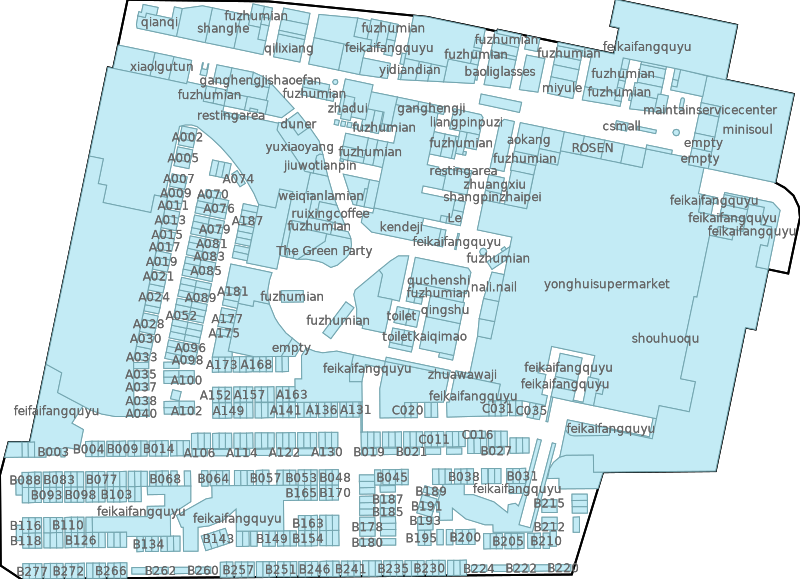

Finish Visualizing Geomagmetic Heatmap of  site1   B1
Processing /content/data/site1/F1/path_data_files/5dd9efa29191710006b5708a.txt...
Processing /content/data/site1/F1/path_data_files/5dd9e7b29191710006b5705b.txt...
Processing /content/data/site1/F1/path_data_files/5ddb96f29191710006b57667.txt...
Processing /content/data/site1/F1/path_data_files/5dd9e7ce9191710006b5706d.txt...
Processing /content/data/site1/F1/path_data_files/5dd9fd37c5b77e0006b173be.txt...
Processing /content/data/site1/F1/path_data_files/5dd9fd599191710006b570e8.txt...
Processing /content/data/site1/F1/path_data_files/5dd9efa7c5b77e0006b17367.txt...
Processing /content/data/site1/F1/path_data_files/5dd9e7c5c5b77e0006b17337.txt...
Processing /content/data/site1/F1/path_data_files/5dd9fd5dc5b77e0006b173d8.txt...
Processing /content/data/site1/F1/path_data_files/5dd9fd30c5b77e0006b173bc.txt...
Processing /content/data/site1/F1/path_data_files/5dda021dc5b77e0006b1740c.txt...
Processing /content/data/site1/F1/path_data_


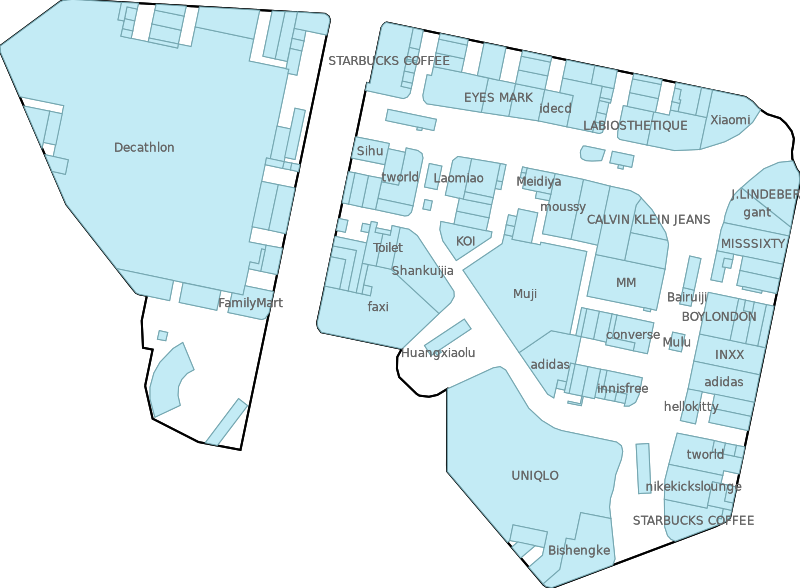

Finish Visualizing Geomagmetic Heatmap of  site1   F1
Processing /content/data/site1/F2/path_data_files/5dda52109191710006b573b5.txt...
Processing /content/data/site1/F2/path_data_files/5dda52629191710006b573cb.txt...
Processing /content/data/site1/F2/path_data_files/5dda5b02c5b77e0006b17721.txt...
Processing /content/data/site1/F2/path_data_files/5dda5a99c5b77e0006b1770b.txt...
Processing /content/data/site1/F2/path_data_files/5dda5b05c5b77e0006b17725.txt...
Processing /content/data/site1/F2/path_data_files/5dda5ae5c5b77e0006b17711.txt...
Processing /content/data/site1/F2/path_data_files/5dda402fc5b77e0006b176c1.txt...
Processing /content/data/site1/F2/path_data_files/5dda40389191710006b57390.txt...
Processing /content/data/site1/F2/path_data_files/5de8de47376b9d0006fdaa5f.txt...
Processing /content/data/site1/F2/path_data_files/5dda4033c5b77e0006b176c3.txt...
Processing /content/data/site1/F2/path_data_files/5dda521e9191710006b573b9.txt...
Processing /content/data/site1/F2/path_data_


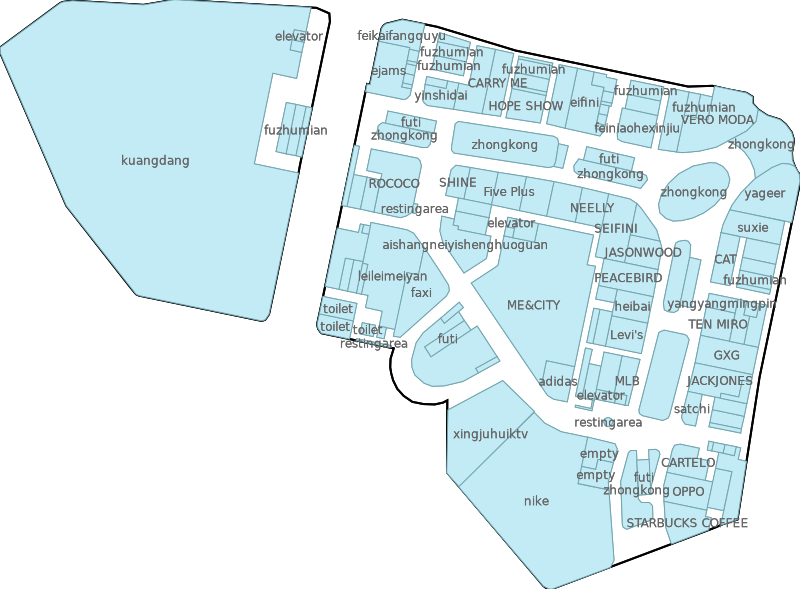

Finish Visualizing Geomagmetic Heatmap of  site1   F2
Processing /content/data/site1/F3/path_data_files/5ddbab389191710006b576f1.txt...
Processing /content/data/site1/F3/path_data_files/5dda748d9191710006b574d4.txt...
Processing /content/data/site1/F3/path_data_files/5ddb9e19c5b77e0006b179de.txt...
Processing /content/data/site1/F3/path_data_files/5dda7460c5b77e0006b177ff.txt...
Processing /content/data/site1/F3/path_data_files/5dda68dcc5b77e0006b177e1.txt...
Processing /content/data/site1/F3/path_data_files/5ddba0cf9191710006b576d3.txt...
Processing /content/data/site1/F3/path_data_files/5dda74939191710006b574d8.txt...
Processing /content/data/site1/F3/path_data_files/5dda748bc5b77e0006b1780b.txt...
Processing /content/data/site1/F3/path_data_files/5dda057f9191710006b5713f.txt...
Processing /content/data/site1/F3/path_data_files/5dda74199191710006b574b6.txt...
Processing /content/data/site1/F3/path_data_files/5dda68df9191710006b574ad.txt...
Processing /content/data/site1/F3/path_data_


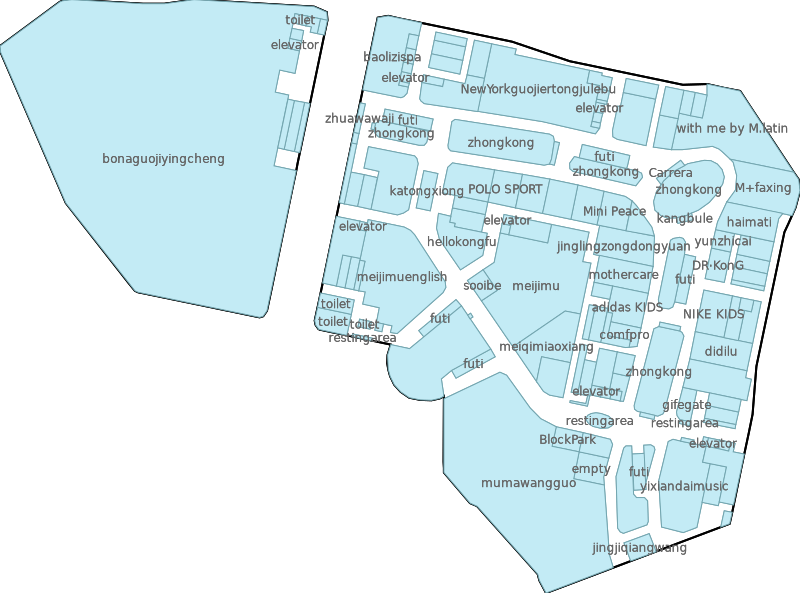

Finish Visualizing Geomagmetic Heatmap of  site1   F3
Processing /content/data/site1/F4/path_data_files/5ddb654bc5b77e0006b1790e.txt...
Processing /content/data/site1/F4/path_data_files/5ddb6f0f9191710006b575fd.txt...
Processing /content/data/site1/F4/path_data_files/5ddba57cc5b77e0006b17a37.txt...
Processing /content/data/site1/F4/path_data_files/5ddb65619191710006b575bd.txt...
Processing /content/data/site1/F4/path_data_files/5ddb65749191710006b575cf.txt...
Processing /content/data/site1/F4/path_data_files/5ddba2bc9191710006b576de.txt...
Processing /content/data/site1/F4/path_data_files/5ddb65369191710006b5759f.txt...
Processing /content/data/site1/F4/path_data_files/5ddb6542c5b77e0006b17908.txt...
Processing /content/data/site1/F4/path_data_files/5ddba4ebc5b77e0006b17a2c.txt...
Processing /content/data/site1/F4/path_data_files/5ddb6561c5b77e0006b17920.txt...
Processing /content/data/site1/F4/path_data_files/5de8efc61ba5a200068722b7.txt...
Processing /content/data/site1/F4/path_data_


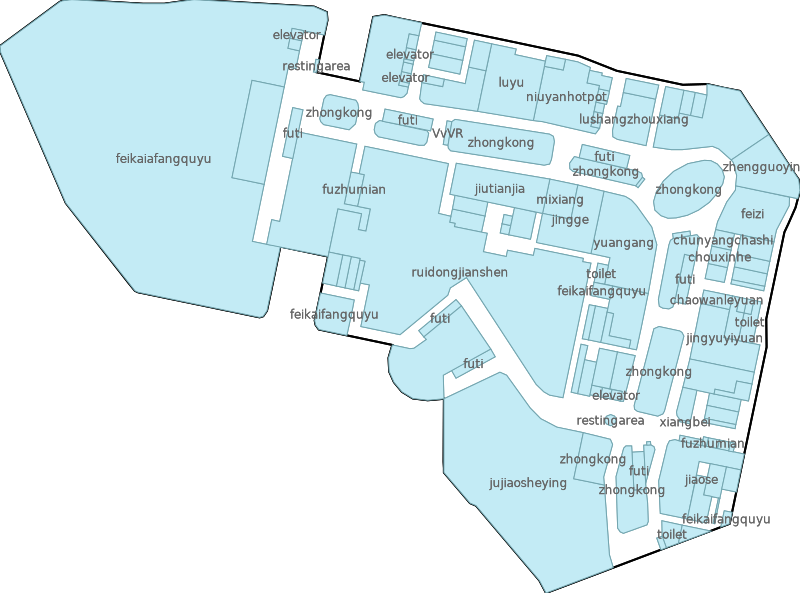

Finish Visualizing Geomagmetic Heatmap of  site1   F4
Processing /content/data/site2/B1/path_data_files/5dd61a487da0810006e24019.txt...
Processing /content/data/site2/B1/path_data_files/5dd61bde7da0810006e24031.txt...
Processing /content/data/site2/B1/path_data_files/5dd511c850e04e0006f5636e.txt...
Processing /content/data/site2/B1/path_data_files/5dd5069f50e04e0006f56289.txt...
Processing /content/data/site2/B1/path_data_files/5dd61f5f7da0810006e24079.txt...
Processing /content/data/site2/B1/path_data_files/5dd506b750e04e0006f56297.txt...
Processing /content/data/site2/B1/path_data_files/5dd61f5e7da0810006e24077.txt...
Processing /content/data/site2/B1/path_data_files/5dd61bddd48f840006f14d50.txt...
Processing /content/data/site2/B1/path_data_files/5dd61bdc7da0810006e2402f.txt...
Processing /content/data/site2/B1/path_data_files/5dd511d650e04e0006f56376.txt...
Processing /content/data/site2/B1/path_data_files/5dd506bc50e04e0006f5629d.txt...
Processing /content/data/site2/B1/path_data_


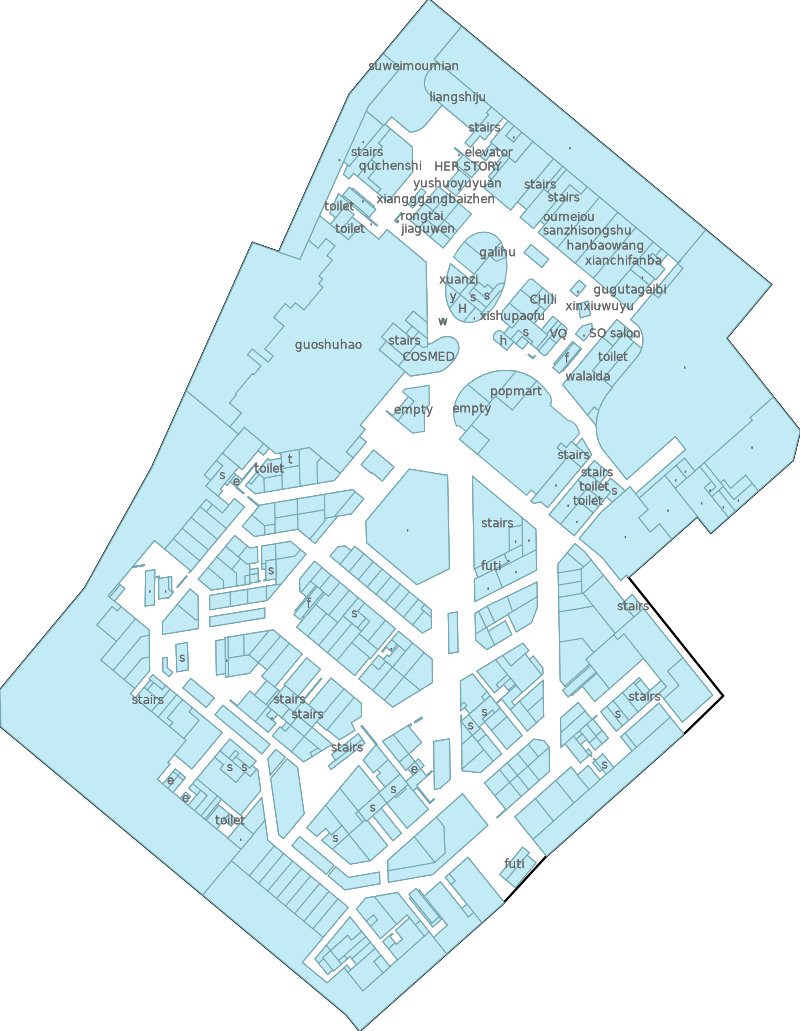

Finish Visualizing Geomagmetic Heatmap of  site2   B1
Processing /content/data/site2/F1/path_data_files/5dd35c9244333f00067aa0de.txt...
Processing /content/data/site2/F1/path_data_files/5dd365ff44333f00067aa120.txt...
Processing /content/data/site2/F1/path_data_files/5dd4a18527889b0006b77591.txt...
Processing /content/data/site2/F1/path_data_files/5dd61435d48f840006f14cd6.txt...
Processing /content/data/site2/F1/path_data_files/5dd35c8127889b0006b76856.txt...
Processing /content/data/site2/F1/path_data_files/5dd614e77da0810006e23ff0.txt...
Processing /content/data/site2/F1/path_data_files/5dd4a19144333f00067aaddf.txt...
Processing /content/data/site2/F1/path_data_files/5dd35c7144333f00067aa0c4.txt...
Processing /content/data/site2/F1/path_data_files/5dd35c9e44333f00067aa0e6.txt...
Processing /content/data/site2/F1/path_data_files/5dd35c9a27889b0006b76864.txt...
Processing /content/data/site2/F1/path_data_files/5dd6177fd48f840006f14d13.txt...
Processing /content/data/site2/F1/path_data_


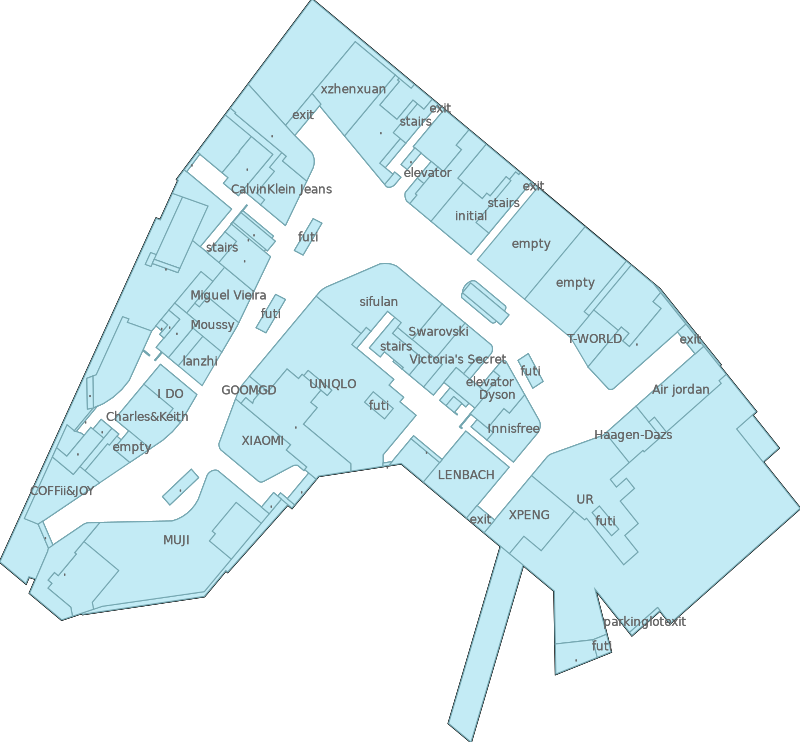

Finish Visualizing Geomagmetic Heatmap of  site2   F1
Processing /content/data/site2/F2/path_data_files/5dd60ec17da0810006e23f99.txt...
Processing /content/data/site2/F2/path_data_files/5dd60ed37da0810006e23f9d.txt...
Processing /content/data/site2/F2/path_data_files/5dd60ed1d48f840006f14c57.txt...
Processing /content/data/site2/F2/path_data_files/5dd3791a27889b0006b7690b.txt...
Processing /content/data/site2/F2/path_data_files/5dd60ed97da0810006e23f9f.txt...
Processing /content/data/site2/F2/path_data_files/5dd36cc627889b0006b768de.txt...
Processing /content/data/site2/F2/path_data_files/5dd60b8750e04e0006f56699.txt...
Processing /content/data/site2/F2/path_data_files/5dd610b0d48f840006f14c7c.txt...
Processing /content/data/site2/F2/path_data_files/5dd611a5d48f840006f14c7f.txt...
Processing /content/data/site2/F2/path_data_files/5dd3792c44333f00067aa1c3.txt...
Processing /content/data/site2/F2/path_data_files/5dd37efb27889b0006b76994.txt...
Processing /content/data/site2/F2/path_data_


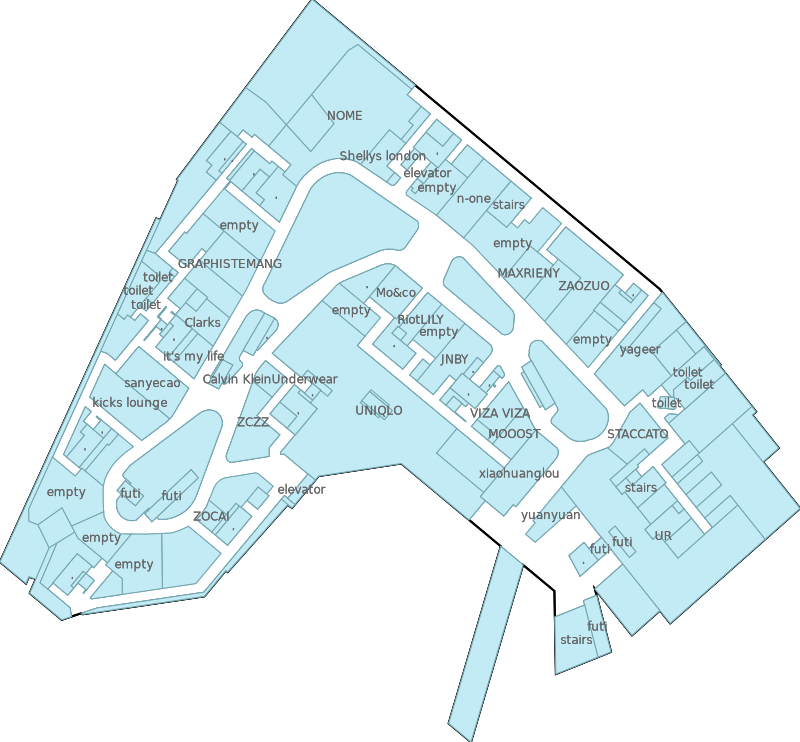

Finish Visualizing Geomagmetic Heatmap of  site2   F2
Processing /content/data/site2/F3/path_data_files/5dd398d727889b0006b76b8d.txt...
Processing /content/data/site2/F3/path_data_files/5dd398dc44333f00067aa447.txt...
Processing /content/data/site2/F3/path_data_files/5dd3904027889b0006b76afc.txt...
Processing /content/data/site2/F3/path_data_files/5dd398de44333f00067aa449.txt...
Processing /content/data/site2/F3/path_data_files/5dd398d127889b0006b76b83.txt...
Processing /content/data/site2/F3/path_data_files/5dd398db44333f00067aa445.txt...
Processing /content/data/site2/F3/path_data_files/5dd3904544333f00067aa3bb.txt...
Processing /content/data/site2/F3/path_data_files/5dd3903644333f00067aa3a9.txt...
Processing /content/data/site2/F3/path_data_files/5dd3901a44333f00067aa393.txt...
Processing /content/data/site2/F3/path_data_files/5dd3901e27889b0006b76adc.txt...
Processing /content/data/site2/F3/path_data_files/5dd51c0650e04e0006f56446.txt...
Processing /content/data/site2/F3/path_data_


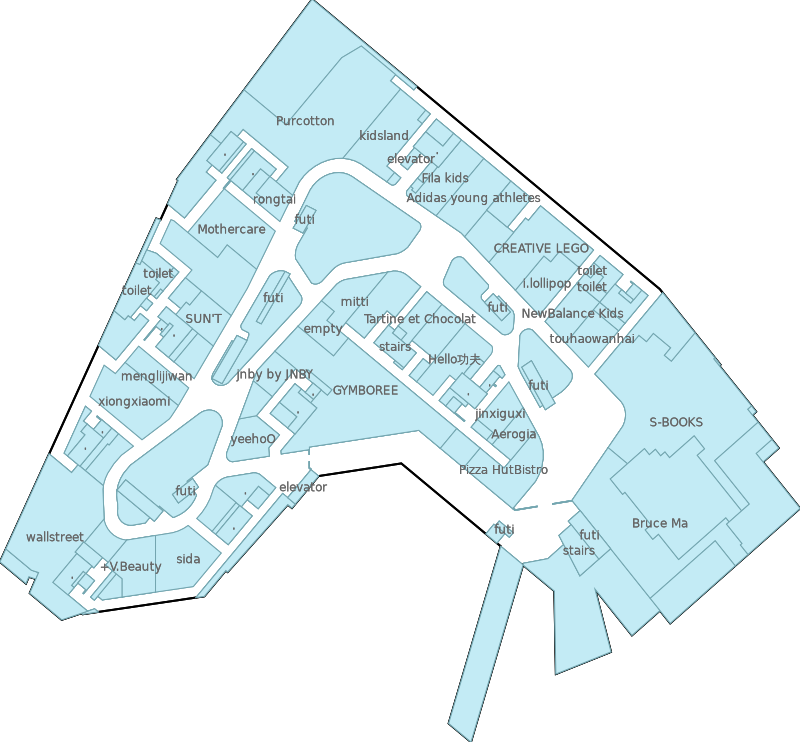

Finish Visualizing Geomagmetic Heatmap of  site2   F3
Processing /content/data/site2/F4/path_data_files/5dd3a32a44333f00067aa5ad.txt...
Processing /content/data/site2/F4/path_data_files/5dd5262250e04e0006f564f5.txt...
Processing /content/data/site2/F4/path_data_files/5dd3bbd627889b0006b76fcb.txt...
Processing /content/data/site2/F4/path_data_files/5dd52058d48f840006f149d1.txt...
Processing /content/data/site2/F4/path_data_files/5dd5205350e04e0006f5645c.txt...
Processing /content/data/site2/F4/path_data_files/5dd3bb5727889b0006b76f98.txt...
Processing /content/data/site2/F4/path_data_files/5dd3bbc027889b0006b76fb5.txt...
Processing /content/data/site2/F4/path_data_files/5dd3abef27889b0006b76daf.txt...
Processing /content/data/site2/F4/path_data_files/5dd3a34c44333f00067aa5c0.txt...
Processing /content/data/site2/F4/path_data_files/5dd5206950e04e0006f56464.txt...
Processing /content/data/site2/F4/path_data_files/5dd3bbd144333f00067aa802.txt...
Processing /content/data/site2/F4/path_data_


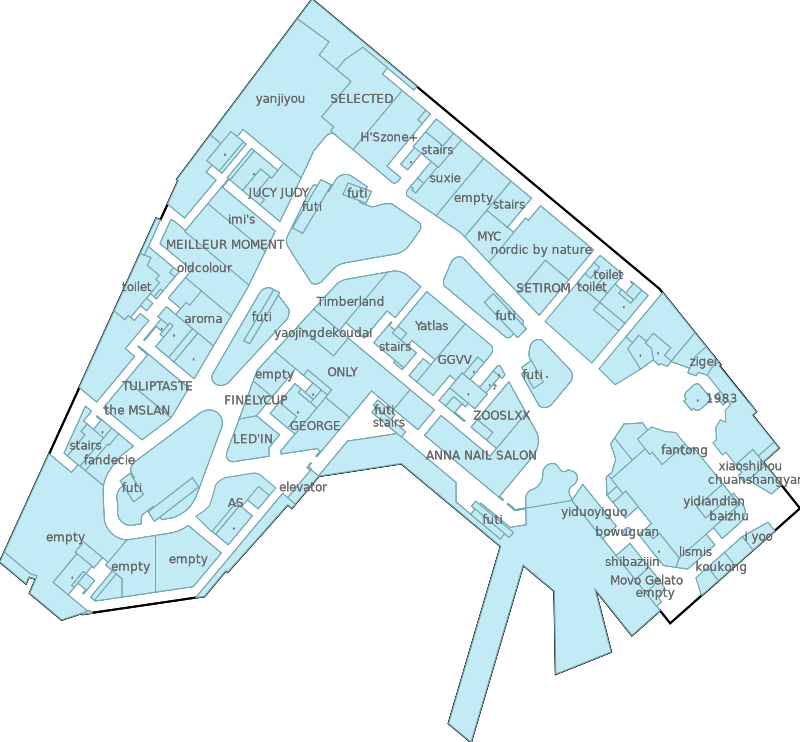

Finish Visualizing Geomagmetic Heatmap of  site2   F4
Processing /content/data/site2/F5/path_data_files/5dd3ce9f27889b0006b77127.txt...
Processing /content/data/site2/F5/path_data_files/5dd3ce6927889b0006b7711f.txt...
Processing /content/data/site2/F5/path_data_files/5dd529f0d48f840006f14a87.txt...
Processing /content/data/site2/F5/path_data_files/5dd3c99f27889b0006b770df.txt...
Processing /content/data/site2/F5/path_data_files/5dd3ce6827889b0006b7711d.txt...
Processing /content/data/site2/F5/path_data_files/5dd3d85744333f00067aaa74.txt...
Processing /content/data/site2/F5/path_data_files/5dd3c9a044333f00067aa923.txt...
Processing /content/data/site2/F5/path_data_files/5dd3c9a027889b0006b770e1.txt...
Processing /content/data/site2/F5/path_data_files/5dd3d86544333f00067aaa80.txt...
Processing /content/data/site2/F5/path_data_files/5dd52a0450e04e0006f56533.txt...
Processing /content/data/site2/F5/path_data_files/5dd529f850e04e0006f56531.txt...
Processing /content/data/site2/F5/path_data_


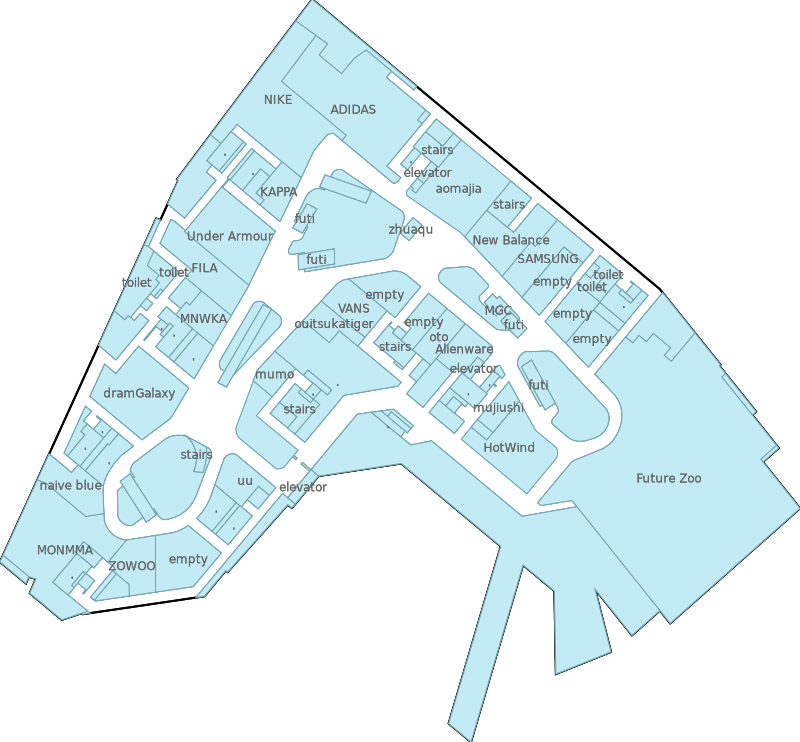

Finish Visualizing Geomagmetic Heatmap of  site2   F5
Processing /content/data/site2/F6/path_data_files/5dd4bf2227889b0006b77895.txt...
Processing /content/data/site2/F6/path_data_files/5dd4b78d44333f00067aaf50.txt...
Processing /content/data/site2/F6/path_data_files/5dd4b7d644333f00067aaf5f.txt...
Processing /content/data/site2/F6/path_data_files/5dd4bec427889b0006b77886.txt...
Processing /content/data/site2/F6/path_data_files/5dd534c5d48f840006f14b38.txt...
Processing /content/data/site2/F6/path_data_files/5dd4b80627889b0006b7772d.txt...
Processing /content/data/site2/F6/path_data_files/5dd4b79b44333f00067aaf54.txt...
Processing /content/data/site2/F6/path_data_files/5dd4b80e44333f00067aaf7c.txt...
Processing /content/data/site2/F6/path_data_files/5dd4ad7e44333f00067aaedc.txt...
Processing /content/data/site2/F6/path_data_files/5dd4ae4227889b0006b7769d.txt...
Processing /content/data/site2/F6/path_data_files/5dd5337ad48f840006f14b35.txt...
Processing /content/data/site2/F6/path_data_


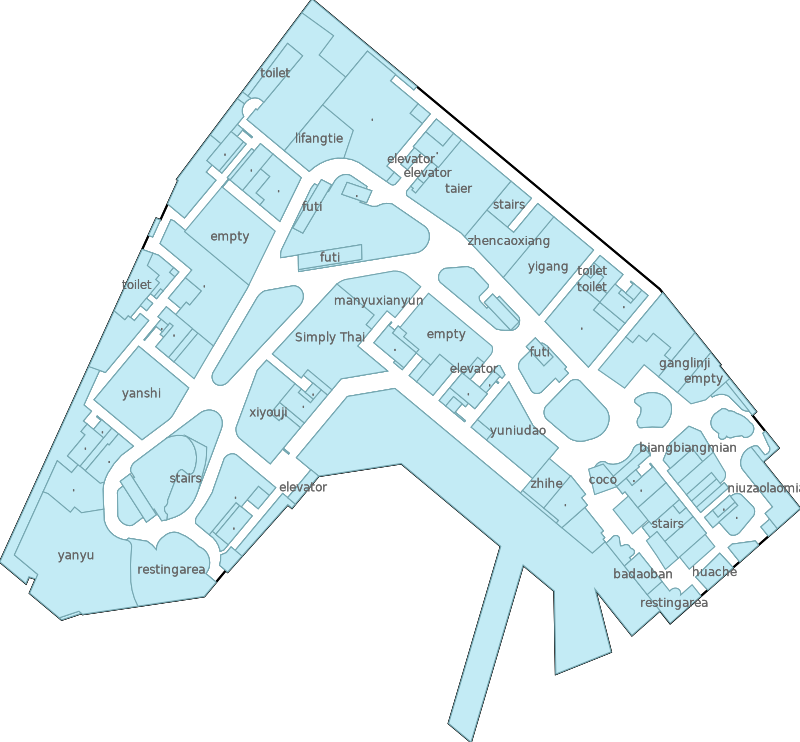

Finish Visualizing Geomagmetic Heatmap of  site2   F6
Processing /content/data/site2/F7/path_data_files/5dd4d3bad48f840006f14483.txt...
Processing /content/data/site2/F7/path_data_files/5dd4d40f50e04e0006f55ed8.txt...
Processing /content/data/site2/F7/path_data_files/5dd4c96927889b0006b7799f.txt...
Processing /content/data/site2/F7/path_data_files/5dd4c97f27889b0006b779ae.txt...
Processing /content/data/site2/F7/path_data_files/5dd4c99227889b0006b779bc.txt...
Processing /content/data/site2/F7/path_data_files/5dd4c98227889b0006b779b2.txt...
Processing /content/data/site2/F7/path_data_files/5dd5ffbb50e04e0006f56653.txt...
Processing /content/data/site2/F7/path_data_files/5dd4c93744333f00067ab1ac.txt...
Processing /content/data/site2/F7/path_data_files/5dd4d41ad48f840006f1449d.txt...
Processing /content/data/site2/F7/path_data_files/5dd4c97c44333f00067ab1c4.txt...
Processing /content/data/site2/F7/path_data_files/5dd4d3f5d48f840006f14487.txt...
Processing /content/data/site2/F7/path_data_


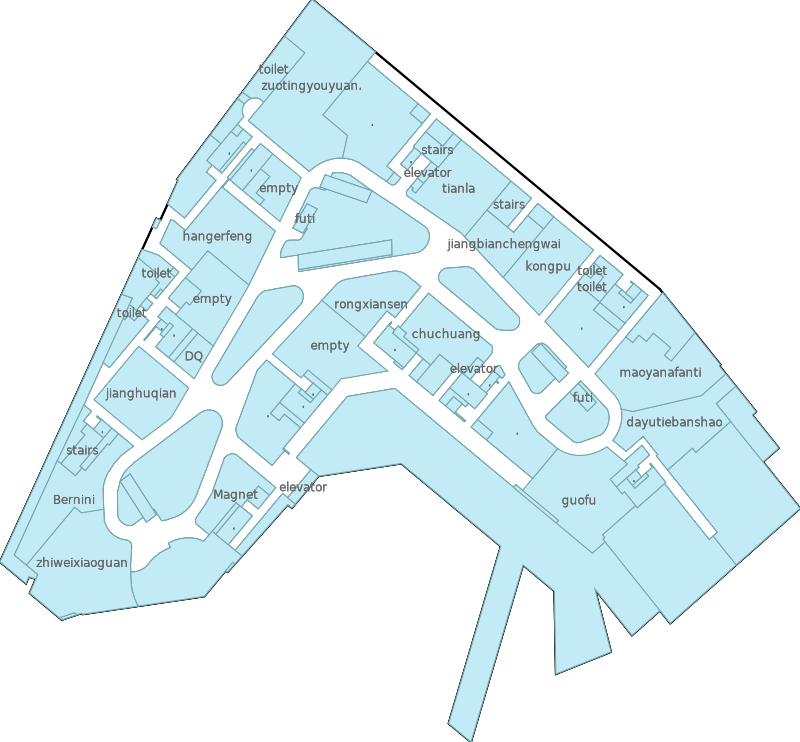

Finish Visualizing Geomagmetic Heatmap of  site2   F7
Processing /content/data/site2/F8/path_data_files/5dd4da9e50e04e0006f55f21.txt...
Processing /content/data/site2/F8/path_data_files/5ddbb90a9191710006b57709.txt...
Processing /content/data/site2/F8/path_data_files/5dd4e32450e04e0006f55fe7.txt...
Processing /content/data/site2/F8/path_data_files/5dd5f910d48f840006f14b73.txt...
Processing /content/data/site2/F8/path_data_files/5ddbb9109191710006b5770d.txt...
Processing /content/data/site2/F8/path_data_files/5dd4e33cd48f840006f14597.txt...
Processing /content/data/site2/F8/path_data_files/5dd4da9d50e04e0006f55f1f.txt...
Processing /content/data/site2/F8/path_data_files/5dd4daa2d48f840006f144e5.txt...
Processing /content/data/site2/F8/path_data_files/5dd4da7d50e04e0006f55f19.txt...
Processing /content/data/site2/F8/path_data_files/5dd5f967d48f840006f14b8d.txt...
Processing /content/data/site2/F8/path_data_files/5ddbb8dac5b77e0006b17a3f.txt...
Processing /content/data/site2/F8/path_data_


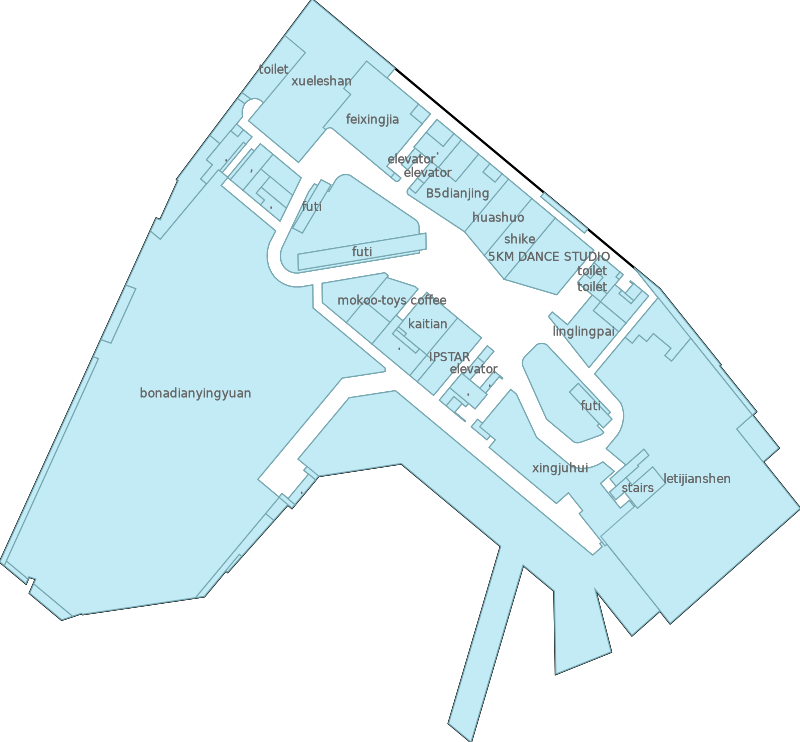

Finish Visualizing Geomagmetic Heatmap of  site2   F8


In [17]:
sites = ['site1','site2']
floor1 = ['B1','F1','F2','F3','F4']
floor2 = ['B1','F1','F2','F3','F4','F5','F6','F7','F8']
for site in sites:
    if site == 'site1':
        for floor in floor1:
            vis_magmetic(site,floor)
    elif site == 'site2':
        for floor in floor2:
            vis_magmetic(site,floor)
    else:
        break